<a href="https://colab.research.google.com/github/JeraldCrisBergantinos/PracticalMachineLearning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install quandl

In [2]:
import pandas as pd
import quandl
import math
import datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
style.use("ggplot")

In [4]:
df = quandl.get("WIKI/GOOGL")

In [5]:
#print(df.head())
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
df = df[["Adj. Open", "Adj. High", "Adj. Low", "Adj. Close", "Adj. Volume"]]

In [7]:
df["HL_PCT"] = ((df["Adj. High"] - df["Adj. Close"]) / df["Adj. Close"]) * 100

In [8]:
df["PCT_CHANGE"] = ((df["Adj. Close"] - df["Adj. Open"]) / df["Adj. Open"]) * 100

In [9]:
df = df[["Adj. Close", "HL_PCT", "PCT_CHANGE", "Adj. Volume"]]

In [10]:
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [11]:
forecast_col = "Adj. Close"

In [12]:
df.fillna(-99999, inplace=True)

In [13]:
pct_df = 0.01
forecast_out = int(math.ceil(pct_df * len(df)))

In [14]:
forecast_out

35

In [15]:
df["label"] = df[forecast_col].shift(-forecast_out)

In [16]:
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849


In [17]:
df.tail()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0,NaN
2018-03-22,1053.15,2.921711,-2.487014,3418154.0,NaN
2018-03-23,1026.55,3.918952,-2.360729,2413517.0,NaN
2018-03-26,1054.09,0.491419,0.332191,3272409.0,NaN
2018-03-27,1006.94,5.720301,-5.353887,2940957.0,NaN


In [18]:
X = np.array(df.drop(["label"], 1))

<ipython-input-18-a51002b283a0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["label"], 1))


In [19]:
X = preprocessing.scale(X)

In [20]:
X = X[:-forecast_out]

In [21]:
X_lately = X[-forecast_out:]

In [22]:
df.dropna(inplace=True)

In [23]:
y = np.array(df["label"])
y = np.array(df["label"])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9784615693457942


In [26]:
#clf = svm.SVR()
#clf.fit(X_train, y_train)
#accuracy = clf.score(X_test, y_test)
#print(accuracy)

In [27]:
#clf = svm.SVR(kernel="poly")
#clf.fit(X_train, y_train)
#accuracy = clf.score(X_test, y_test)
#print(accuracy)

In [28]:
#clf = LinearRegression(n_jobs=10)
#clf.fit(X_train, y_train)
#accuracy = clf.score(X_test, y_test)
#print(accuracy)

In [29]:
#clf = LinearRegression(n_jobs=-1)
#clf.fit(X_train, y_train)
#accuracy = clf.score(X_test, y_test)
#print(accuracy)

In [30]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1076.20606094 1090.74539939 1104.63559836 1099.12878996 1092.64762684
 1090.04502573 1088.40089983 1085.33854636 1079.26675624 1074.93524718
 1072.57333697 1092.49205621 1110.86852209 1115.05329637 1129.95355725
 1133.93506823 1132.41703949 1130.01631383 1131.73601968 1150.48761673
 1149.56631168 1159.29000195 1155.87912039 1163.69699608 1184.35247215
 1196.40377108 1190.71931815 1202.56060747 1208.00465086 1206.38338295
 1197.14813742 1202.48978768 1201.33528429 1136.93521653 1084.50019919] 0.9784615693457942 35


In [31]:
df["Forecast"] = np.nan

In [32]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [45]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

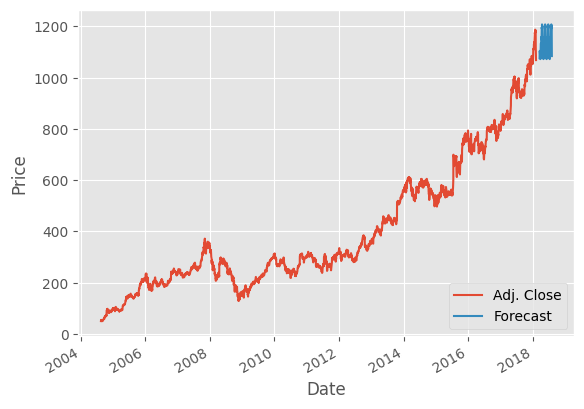

In [46]:
df["Adj. Close"].plot()
df["Forecast"].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [47]:
df.head()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238,NaN
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414,NaN
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727,NaN
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146,NaN
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849,NaN


In [48]:
df.tail()

,Adj. Close,HL_PCT,PCT_CHANGE,Adj. Volume,label,Forecast
Date,,,,,,
2018-07-30,NaN,NaN,NaN,NaN,NaN,1197.148137
2018-07-31,NaN,NaN,NaN,NaN,NaN,1202.489788
2018-08-01,NaN,NaN,NaN,NaN,NaN,1201.335284
2018-08-02,NaN,NaN,NaN,NaN,NaN,1136.935217
2018-08-03,NaN,NaN,NaN,NaN,NaN,1084.500199
